In [1]:
pip install tweepy



  Obtaining dependency information for tweepy from https://files.pythonhosted.org/packages/4d/78/ba0065d5636bbf4a35b78c4f81b74e7858b609cdf69e629d6da5c91b9d92/tweepy-4.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for oauthlib<4,>=3.2.0 from https://files.pythonhosted.org/packages/7e/80/cab10959dc1faead58dc8384a781dfbf93cb4d33d50988f7a69f1b7c9bbe/oauthlib-3.2.2-py3-none-any.whl.metadata
  Obtaining dependency information for requests-oauthlib<2,>=1.2.0 from https://files.pythonhosted.org/packages/6f/bb/5deac77a9af870143c684ab46a7934038a53eb4aa975bc0687ed6ca2c610/requests_oauthlib-1.3.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/98.5 kB ? eta -:--:--
   -------------------- ------------------- 51.2/98.5 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 98.5/98.5 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/151.7 kB ? eta -:--:--
   ---------------------------------------- 151.7/151.7 kB 4

In [6]:
import tweepy
import pandas as pd

# Set up Tweepy authentication using Bearer Token for API v2
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAMH1xQEAAAAABeuB8LSFPNVaN2jBSc5Iz6Me3N0%3D8OHfvylglRc6FDq4y4xguoxEn3JUariZo1tIAJKAt52GSPmEtY'  # Replace with your Bearer Token

# Set up Tweepy client for API v2
client = tweepy.Client(bearer_token=bearer_token)

# Define search query and collect tweets
query = 'Python programming'  # Example search term
tweets = client.search_recent_tweets(query=query, max_results=100, tweet_fields=['created_at', 'text'])

# Collect tweet data into a DataFrame
data = []
for tweet in tweets.data:
    data.append({'date': tweet.created_at, 'tweet': tweet.text})

df = pd.DataFrame(data)
print(df.head())



                       date                                              tweet
0 2024-12-11 15:56:39+00:00  CS50's Introduction to Programming with Python...
1 2024-12-11 15:56:35+00:00  RT @manishkumar_dev: Free Certification Course...
2 2024-12-11 15:52:36+00:00  Send Me A DM for all digital hacking\n#Machine...
3 2024-12-11 15:52:27+00:00  Contact me now for Hacking or Account Recovery...
4 2024-12-11 15:52:24+00:00  Have Your account been\nHacked Dm now for help...


In [8]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Preprocess the text data
def preprocess_text(text):
    # Remove URLs, mentions, and special characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+', '', text)  # Remove @mentions
    text = re.sub(r'\W', ' ', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

# Apply preprocessing to each tweet
df['cleaned_tweet'] = df['tweet'].apply(preprocess_text)
df['tokens'] = df['cleaned_tweet'].apply(word_tokenize)


[nltk_data] Downloading package stopwords to C:\Users\Priya
[nltk_data]     Rajakumar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\Users\Priya
[nltk_data]     Rajakumar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [11]:
# Function to calculate sentiment polarity (positive or negative sentiment)
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to each tweet
df['sentiment'] = df['cleaned_tweet'].apply(get_sentiment)

# Classify sentiment as positive, neutral, or negative
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Print a sample of the results
print(df[['date', 'tweet', 'sentiment', 'sentiment_label']].head())


                       date  \
0 2024-12-11 15:56:39+00:00   
1 2024-12-11 15:56:35+00:00   
2 2024-12-11 15:52:36+00:00   
3 2024-12-11 15:52:27+00:00   
4 2024-12-11 15:52:24+00:00   

                                               tweet  sentiment  \
0  CS50's Introduction to Programming with Python...        0.0   
1  RT @manishkumar_dev: Free Certification Course...        0.4   
2  Send Me A DM for all digital hacking\n#Machine...        0.0   
3  Contact me now for Hacking or Account Recovery...       -0.6   
4  Have Your account been\nHacked Dm now for help...        0.0   

  sentiment_label  
0         neutral  
1        positive  
2         neutral  
3        negative  
4         neutral  


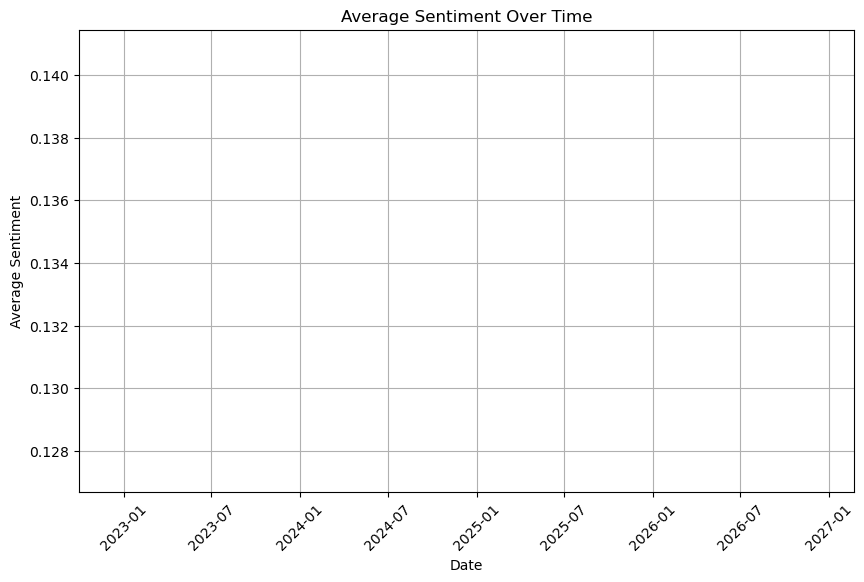

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' column to datetime for easier plotting
df['date'] = pd.to_datetime(df['date'])

# Group by date and calculate average sentiment per day
daily_sentiment = df.groupby(df['date'].dt.date).agg(
    avg_sentiment=('sentiment', 'mean')
).reset_index()

# Plot the sentiment trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_sentiment, x='date', y='avg_sentiment', color='blue')
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


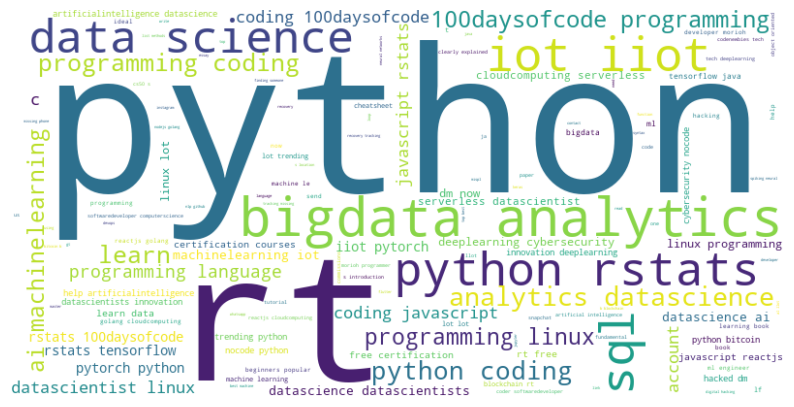

In [13]:
from wordcloud import WordCloud

# Join all tweets into a single string
all_text = ' '.join(df['cleaned_tweet'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
